In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import os
from nltk.tokenize import word_tokenize, sent_tokenize
from collections import Counter
from tqdm import tqdm

def sortedByValue( dict , ascending = True ):
    if ascending: 
        return {k: v for k, v in sorted(dict.items(), key=lambda item: item[1])}
    else:
        return {k: v for k, v in reversed( sorted(dict.items(), key=lambda item: item[1]))}

import string
punctuation_marks = [char for char in string.punctuation]

from nltk.corpus import stopwords
stopword_list = stopwords.words('english')
stopword_list.extend(['``','\'s','\'\'','n\'t'])
for mark in string.punctuation + '“”’—‘':
    stopword_list.append(mark)
    
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
#from nltk.sentiment.vader import SentimentIntensityAnalyzer

ana = SentimentIntensityAnalyzer()

In [2]:
goodreads = pd.read_csv('goodreads_statistics.csv')
amazon = pd.read_csv('amazon_statistics.csv')

all_isbns = goodreads['isbn'].unique().tolist() + amazon['isbn'].unique().tolist()
all_isbns = list(set(all_isbns))

In [3]:
def get_value_for_isbn(df,isbn,column):
    value = df.query(f'isbn=={isbn}')[column]
    if not(value is None) and len(value)>0:
        return float(value)
    else:
        return None

## Average Review Length (words)

In [4]:
x_axis = []
y_axis = []

for isbn in all_isbns:
    #print(isbn)
    x_value = get_value_for_isbn(goodreads,isbn,'average_tokens')
    y_value = get_value_for_isbn(amazon,isbn,'average_tokens')
    if not(x_value is None) and not(y_value is None):
        x_axis.append(x_value)
        y_axis.append(y_value)

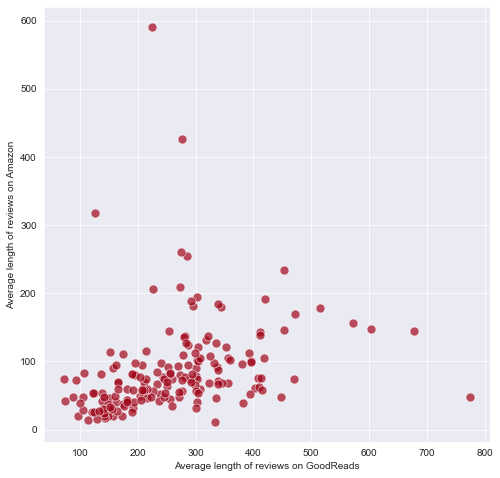

In [5]:
fig = plt.figure( figsize = ( 8,8 ))
sns.set_style("darkgrid")

ax = sns.scatterplot( x = x_axis , y = y_axis , alpha = 0.7,
                     color = '#a0061a' , s = 80 ) 

ax.set_xlabel('Average length of reviews on GoodReads')
ax.set_ylabel('Average length of reviews on Amazon')

plt.show()

Text(0, 0.5, 'Average length of reviews (number of words)')

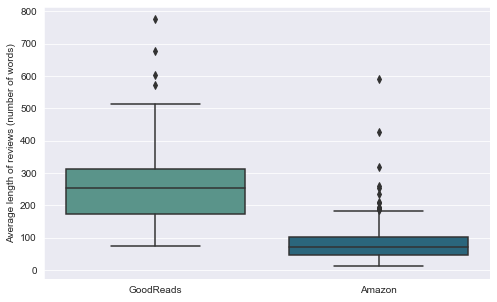

In [6]:
fig = plt.figure( figsize = ( 8, 5))
data = pd.DataFrame( {'GoodReads':x_axis,'Amazon':y_axis} )
ax = sns.boxplot(data=data , palette = 'crest' )
ax.set_ylabel('Average length of reviews (number of words)')

In [7]:
print(f"The average length of the reviews on Goodreads is {round(goodreads['average_tokens'].mean(),2)} words.")
print(f"The average length of the reviews on Amazon is {round(amazon['average_tokens'].mean(),2)} words.")

The average length of the reviews on Goodreads is 257.36 words.
The average length of the reviews on Amazon is 85.71 words.


## Average Sentence Length

In [8]:
goodreads['avg_sentence_length'] = goodreads['nr_tokens'] / goodreads['nr_sentences']
amazon['avg_sentence_length'] = amazon['nr_tokens'] / amazon['nr_sentences']

In [9]:
x_axis = []
y_axis = []

for isbn in all_isbns:
    #print(isbn)
    x_value = get_value_for_isbn(goodreads,isbn,'avg_sentence_length')
    y_value = get_value_for_isbn(amazon,isbn,'avg_sentence_length')
    if not(x_value is None) and not(y_value is None):
        x_axis.append(x_value)
        y_axis.append(y_value)

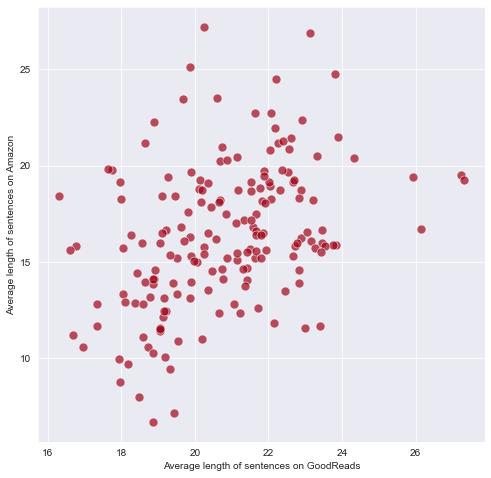

In [10]:
fig = plt.figure( figsize = ( 8,8 ))
sns.set_style("darkgrid")

ax = sns.scatterplot( x = x_axis , y = y_axis , alpha = 0.7,
                     color = '#a0061a' , s = 80 ) 

ax.set_xlabel('Average length of sentences on GoodReads')
ax.set_ylabel('Average length of sentences on Amazon')

plt.show()

Text(0, 0.5, 'Average length of reviews (sentences)')

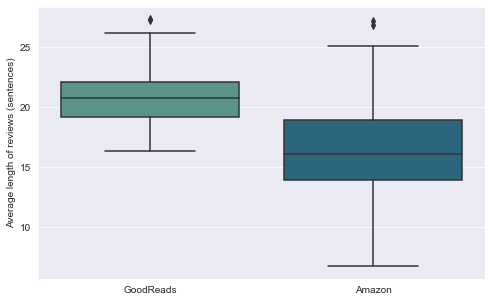

In [11]:
fig = plt.figure( figsize = ( 8, 5))
data = pd.DataFrame( {'GoodReads':x_axis,'Amazon':y_axis} )
ax = sns.boxplot(data=data , palette = 'crest' )
ax.set_ylabel('Average length of reviews (sentences)')

In [12]:
print(f"The average length of the sentences in the reviews on Goodreads is {round(goodreads['avg_sentence_length'].mean(),2)} words.")
print(f"The average length of the sentences in the reviews on Amazon is {round(amazon['avg_sentence_length'].mean(),2)} words.")

The average length of the sentences in the reviews on Goodreads is 20.69 words.
The average length of the sentences in the reviews on Amazon is 16.36 words.


## Average number of sentences

In [13]:
goodreads['avg_nr_sentences'] = goodreads['nr_sentences'] / goodreads['downloaded_reviews']
amazon['avg_nr_sentences'] = amazon['nr_sentences'] / amazon['nr_reviews']

In [14]:
x_axis = []
y_axis = []

for isbn in all_isbns:
    #print(isbn)
    x_value = get_value_for_isbn(goodreads,isbn,'avg_nr_sentences')
    y_value = get_value_for_isbn(amazon,isbn,'avg_nr_sentences')
    if not(x_value is None) and not(y_value is None):
        x_axis.append(x_value)
        y_axis.append(y_value)

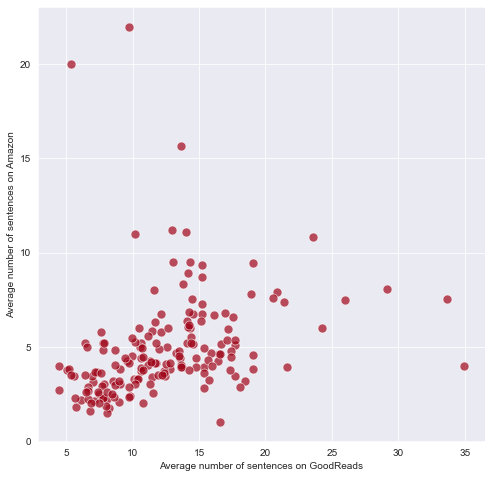

In [15]:
fig = plt.figure( figsize = ( 8,8 ))
sns.set_style("darkgrid")

ax = sns.scatterplot( x = x_axis , y = y_axis , alpha = 0.7,
                     color = '#a0061a' , s = 80 ) 

ax.set_xlabel('Average number of sentences on GoodReads')
ax.set_ylabel('Average number of sentences on Amazon')

plt.show()

Text(0, 0.5, 'Average number of sentences in reviews')

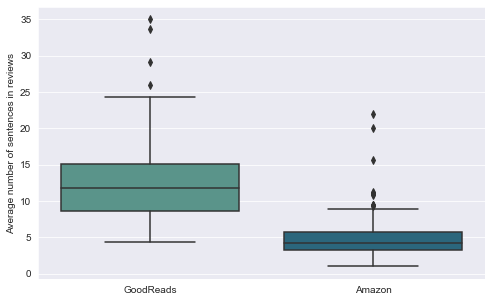

In [16]:
fig = plt.figure( figsize = ( 8, 5))
data = pd.DataFrame( {'GoodReads':x_axis,'Amazon':y_axis} )
ax = sns.boxplot(data=data , palette = 'crest' )
ax.set_ylabel('Average number of sentences in reviews')

In [17]:
print(f"The average number of sentences in the reviews on Goodreads is {round(goodreads['avg_nr_sentences'].mean(),2)}.")
print(f"The average number of sentences in the reviews on Amazon is {round(amazon['avg_nr_sentences'].mean(),2)}.")

The average number of sentences in the reviews on Goodreads is 12.28.
The average number of sentences in the reviews on Amazon is 4.87.


## Average rating

In [18]:
x_axis = []
y_axis = []

for isbn in all_isbns:
    #print(isbn)
    x_value = get_value_for_isbn(goodreads,isbn,'average_rating')
    y_value = get_value_for_isbn(amazon,isbn,'average_rating')
    if not(x_value is None) and not(y_value is None):
        x_axis.append(x_value)
        y_axis.append(y_value)

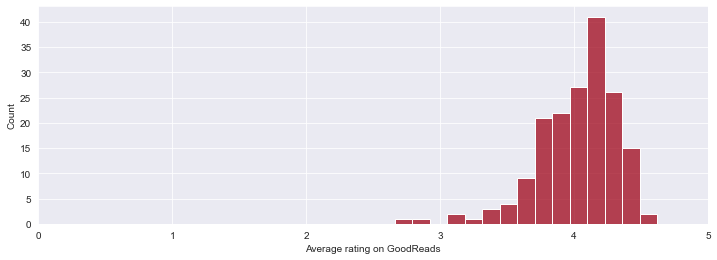

In [19]:
fig = plt.figure( figsize = ( 12,4 ))
sns.set_style("darkgrid")


ax = sns.histplot( x = x_axis ,
                     color = '#a0061a') 

ax.set_xlabel('Average rating on GoodReads')

ax.set(xlim=( 0,5 ))

plt.show()

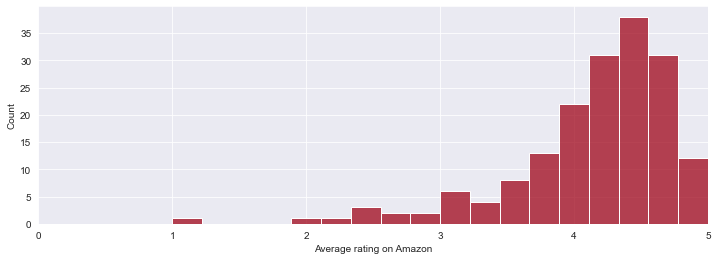

In [20]:
fig = plt.figure( figsize = ( 12,4 ))
sns.set_style("darkgrid")


ax = sns.histplot( x = y_axis ,
                     color = '#a0061a') 

ax.set_xlabel('Average rating on Amazon')

ax.set(xlim=( 0,5 ))

plt.show()

Text(0, 0.5, 'Average length of reviews (sentences)')

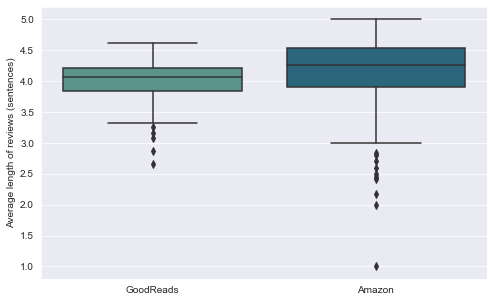

In [21]:
fig = plt.figure( figsize = ( 8, 5))
data = pd.DataFrame( {'GoodReads':x_axis,'Amazon':y_axis} )
ax = sns.boxplot(data=data , palette = 'crest' )
ax.set_ylabel('Average length of reviews (sentences)')

In [22]:
print(f"The average rating on Goodreads is {round(goodreads['average_rating'].mean(),2)}.")
print(f"The average rating on Amazon is {round(amazon['average_rating'].mean(),2)}.")

The average rating on Goodreads is 4.02.
The average rating on Amazon is 4.13.


## Average positive sentiment score

In [23]:
x_axis = []
y_axis = []

for isbn in all_isbns:
    #print(isbn)
    x_value = get_value_for_isbn(goodreads,isbn,'positive')
    y_value = get_value_for_isbn(amazon,isbn,'positive')
    if not(x_value is None) and not(y_value is None):
        x_axis.append(x_value)
        y_axis.append(y_value)

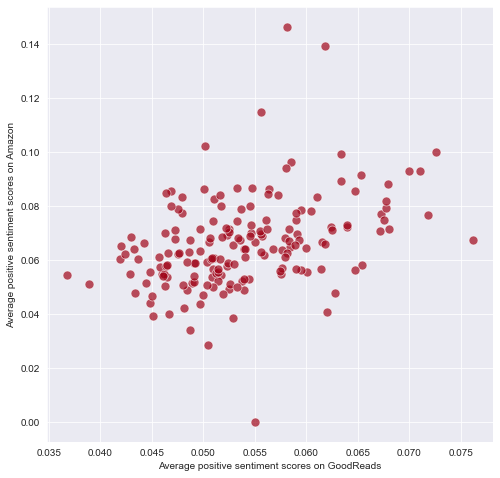

In [24]:
fig = plt.figure( figsize = ( 8,8 ))
sns.set_style("darkgrid")

ax = sns.scatterplot( x = x_axis , y = y_axis , alpha = 0.7,
                     color = '#a0061a' , s = 80 ) 

ax.set_xlabel('Average positive sentiment scores on GoodReads')
ax.set_ylabel('Average positive sentiment scores on Amazon')

plt.show()

Text(0, 0.5, 'Average positive sentiment scores')

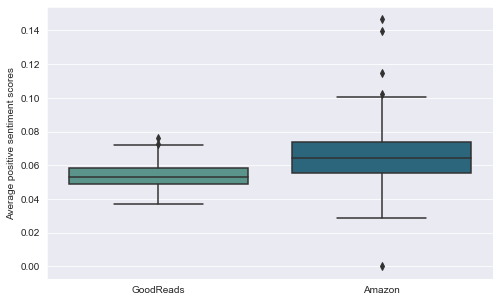

In [25]:
fig = plt.figure( figsize = ( 8, 5))
data = pd.DataFrame( {'GoodReads':x_axis,'Amazon':y_axis} )
ax = sns.boxplot(data=data , palette = 'crest' )
ax.set_ylabel('Average positive sentiment scores')

In [26]:
print(f"The average positive sentiment score on Goodreads is {round(goodreads['positive'].mean(),2)}.")
print(f"The average positive sentiment score on Amazon is {round(amazon['positive'].mean(),2)}.")

The average positive sentiment score on Goodreads is 0.05.
The average positive sentiment score on Amazon is 0.07.


## Average negative sentiment score

In [27]:
x_axis = []
y_axis = []

for isbn in all_isbns:
    #print(isbn)
    x_value = get_value_for_isbn(goodreads,isbn,'negative')
    y_value = get_value_for_isbn(amazon,isbn,'negative')
    if not(x_value is None) and not(y_value is None):
        x_axis.append(x_value)
        y_axis.append(y_value)

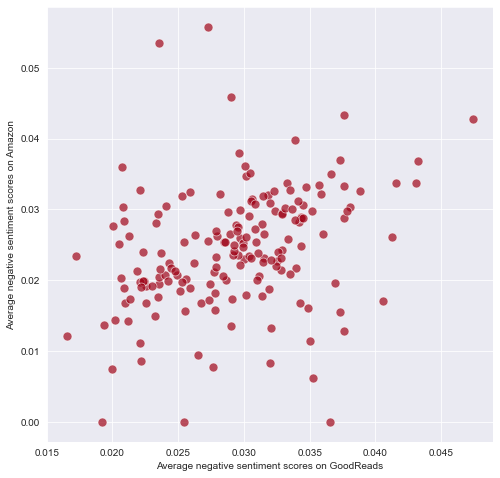

In [28]:
fig = plt.figure( figsize = ( 8,8 ))
sns.set_style("darkgrid")

ax = sns.scatterplot( x = x_axis , y = y_axis , alpha = 0.7,
                     color = '#a0061a' , s = 80 ) 

ax.set_xlabel('Average negative sentiment scores on GoodReads')
ax.set_ylabel('Average negative sentiment scores on Amazon')

plt.show()

Text(0, 0.5, 'Average negative sentiment scores')

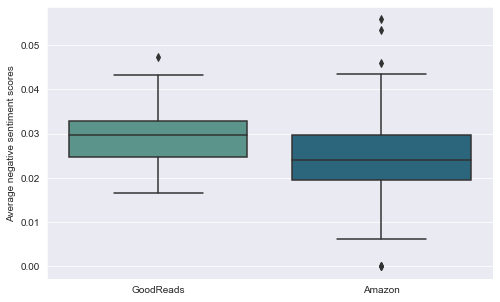

In [29]:
fig = plt.figure( figsize = ( 8, 5))
data = pd.DataFrame( {'GoodReads':x_axis,'Amazon':y_axis} )
ax = sns.boxplot(data=data , palette = 'crest' )
ax.set_ylabel('Average negative sentiment scores')

In [30]:
print(f"The average negative sentiment score on Goodreads is {round(goodreads['negative'].mean(),4)}.")
print(f"The average negative sentiment score on Amazon is {round(amazon['negative'].mean(),4)}.")

The average negative sentiment score on Goodreads is 0.0293.
The average negative sentiment score on Amazon is 0.0244.


## Textual analysis

In [31]:
def clean(text):
    text = re.sub(r'[.]','. ',text)
    text = re.sub(r'\b\d+\b','',text)
    text = re.sub(r'[-]\b','',text)
    text = re.sub(r'\b[-]','',text)
    text = re.sub(r'\s+',' ',text)
    return text.lower()


In [32]:
print('Analyzing Goodreads reviews ... ')

directory = 'Goodreads_reviews'
files = [os.path.join(directory,file) for file in os.listdir(directory) if not(re.search(r'^[.]',file))]

goodreads_reviews = ''
goodreads_words = Counter()

for path in tqdm(files):

    reviews_file = open(path,encoding='utf-8')
    
    for line in reviews_file:
        line = clean(line)
        if re.search('^\d*\t',line):
            line = re.sub('^\d*\t','',line).strip().lower()
        goodreads_reviews += line + ' '
        words = word_tokenize(clean(reviews_file.read()))
        words = [word for word in words if word not in stopword_list]
        goodreads_words.update(words)
        
print('Analyzing Amazon reviews ... ')
        
directory = 'Amazon_reviews'
files = [os.path.join(directory,file) for file in os.listdir(directory) if not(re.search(r'^[.]',file))]

amazon_reviews = ''
amazon_words = Counter()
for path in tqdm(files):

    reviews_file = open(path,encoding='utf-8')
    
    for line in reviews_file:
        line = clean(line)
        if re.search('^\d*\t',line):
            line = re.sub('^\d*\t','',line).strip().lower()
        amazon_reviews += line + ' '
        
        words = word_tokenize(clean(reviews_file.read()))
        words = [word for word in words if word not in stopword_list]
        amazon_words.update(words)

Analyzing Goodreads reviews ... 


100%|█████████████████████████████████████████| 240/240 [00:32<00:00,  7.40it/s]


Analyzing Amazon reviews ... 


100%|█████████████████████████████████████████| 175/175 [00:03<00:00, 44.25it/s]


## Most frequent words 

30 most frequent words in goodreads reviews.

In [33]:
for word,count in goodreads_words.most_common(30):
    print(f'{word} => {count}')

book => 27306
one => 14905
story => 12534
read => 12431
like => 10757
characters => 8388
time => 6887
would => 6696
really => 6682
books => 6450
life => 6357
love => 6249
much => 6223
novel => 5946
also => 5897
series => 5450
even => 5386
first => 5329
get => 5280
way => 5274
good => 5114
character => 4776
could => 4759
know => 4677
reading => 4658
people => 4600
well => 4590
many => 4558
think => 4399
new => 4088


30 most frequent words in Amazon reviews.

In [34]:
for word,count in goodreads_words.most_common(30):
    print(f'{word} => {count}')

book => 27306
one => 14905
story => 12534
read => 12431
like => 10757
characters => 8388
time => 6887
would => 6696
really => 6682
books => 6450
life => 6357
love => 6249
much => 6223
novel => 5946
also => 5897
series => 5450
even => 5386
first => 5329
get => 5280
way => 5274
good => 5114
character => 4776
could => 4759
know => 4677
reading => 4658
people => 4600
well => 4590
many => 4558
think => 4399
new => 4088


## Unique words

Which words in Goodreads reviews are NEVER used in Amazon reviews? The list only shows the 50 most frequent unique words.

In [35]:
count = 0
for word in goodreads_words.keys():
    if word not in amazon_words.keys():
        count+=1
        print(word)
        if count==50:
            break

thats
eds
wouldnt
recommendable
niche
onboard
lifes
↠
starswhat
radar
enticed
slice
centering
lyingin
midwife
helper
yearsold
nunrun
orphanage
name—do
forged
wwi
orderly
groyne
motherstobe
garrett
ita
noonan
rahilly
burdens
duration
confined
shackled
obgyn
rotation
witnessing
claustrophobic
contagious
births
rapists
magdalene
laundries
volunteered
birdie
disturbs
incest
pessimistic
numb
stove
humanly


Which words in Amazon reviews are NEVER used in Goodreads reviews? The list only shows the 50 most frequent unique words.

In [36]:
count = 0
for word in amazon_words.keys():
    if word not in goodreads_words.keys():
        count+=1
        print(word)
        if count==50:
            break

kewaunee
busman
characters-until
💗🦋
reallyyyy
sheeeeesh
great_book
suxxx
suckedi
nottt
2get
friemd
briscoe
nonoffensive
fourpage
schlock
paragraph.
shop.
investigatigation
likedmajor
drats
scrubbed
nevev
espect
cote
intriquing
walledoff
selfraised
really.
seamarsh
stirrings
kyla
copulated
grippingly
showers/bath
barefooted
lved
described.
thoes
toput
fends
triumphed
morth
dymanic
'suspense
yessss
mosquitoes
bookcall
days♥️
facinating


## Distinctive words

One of statistical methods that can be used to find such distinctive words is Dunning’s log likelihood. In short, it analyses the distinctiveness of word in one set of texts compared to the texts in a reference corpus, by calculating probabilities based on word frequencies. A good explanation of the fomula can be found on the [wordHoard](https://wordhoard.northwestern.edu/userman/analysis-comparewords.html#loglike) website.

Using the frequencies that have been calculated above, the Dunning log likelihood scores are calculated for all of the words that occur both in corpus1 and corpus2 in the cell below. The actual calculation takes place in a method named `log_likelihood()`. The scores that are calculated are all stored in a dictionary named ll_scores

The formula that is implemented in the log_likelihood method returns a number which can either be positive or negative. A postive score indicates that there is a high probability that the word will be used in the first corpus. A negative probability indicates that occurence of the word is more common in the second corpus. The tokens that are assigned the highest scores, in other words, are also most distincive of the first corpus.

The code below lists the words that are assigned a positive log likelihood score in the first corpus.

See also [TDM tutorial, chapter on Diction](https://cdsleiden.github.io/tdm-tutorial/notebooks/9%20Diction.html)

In [37]:
total1 = sum(goodreads_words.values())
total2 = sum(amazon_words.values())

Which words are distinctive for the Goodreads reviews?

In [38]:
ll_scores = dict()
from tdm import log_likelihood

for word in goodreads_words.keys():
    if word in amazon_words.keys():

        ll_score = log_likelihood( goodreads_words[word] , amazon_words[word] , total1 , total2 )
        ll_scores[word] = ll_score

max = 25
i = 0 
        
for word in sortedByValue(ll_scores , ascending = False ):
    print( word , ll_scores[word] )
    i += 1
    if i == max: 
        break  

br 618.3910112105156
spoiler 150.8533544846391
– 140.37315453049231
hide 105.06773623159091
-- 93.08256246683644
netgalley 90.52936161990037
steel 76.84648240572514
lucas 75.13700184360934
favourite 69.11556198500472
war 67.67992612963971
decker 63.730700279719926
stone 61.96323671461357
mother 58.4405450367571
davenport 55.85860535857253
also 55.811371789458406
women 52.88897468007005
death 51.471126656201605
blog 51.13421779773901
ryan 48.80598884557139
side 46.77369042018657
review 45.64709334985898
mary 43.60647222146341
investigation 43.51023096309083
exchange 41.73861175166631
man 41.66213167357702


Which words are distinctive for the Amazon reviews?

In [39]:
max = 25
i = 0 

for word in sortedByValue(ll_scores ) :
    print( word , ll_scores[word] )
    i += 1
    if i == max:
        break   

great -2853.6257755751285
book -2235.0765730823387
read -2137.6373704265025
good -1097.0872430601335
put -692.7893737747808
story -628.5111995789043
excellent -527.9213182580925
written -446.9808814532157
gift -384.15989118143136
recommend -375.1009199182497
loved -362.79423550756974
kya -334.4357579895992
marsh -315.0023726903097
author -285.8461491181372
best -276.666393926806
turner -263.42217035004194
grisham -261.3483573049625
wonderful -253.32586963749606
bought -240.6471510977662
enjoyed -238.34452003025058
page -231.1371140025053
interesting -211.90282204864542
reading -198.61348045598277
condition -194.2009601432839
disappointed -193.79956921430073


## Sentiment Analysis

In [40]:
sentiment_goodreads = dict()

positive = []
negative = []

for word in goodreads_words.keys(): 
    word = re.sub(r'[\'-]' , '' , word)

    scores = ana.polarity_scores(word)
    if scores['compound'] > 0.5:
        positive.append(word)
    elif scores['compound'] < -0.5:
        negative.append(word)
        
sentiment_goodreads['positive'] = positive
sentiment_goodreads['negative'] = negative

sentiment_amazon = dict()

positive = []
negative = []

for word in amazon_words.keys(): 
    word = re.sub(r'[\'-.]' , '' , word)

    scores = ana.polarity_scores(word)
    if scores['compound'] > 0.5:
        positive.append(word)
    elif scores['compound'] < -0.5:
        negative.append(word)
        
sentiment_amazon['positive'] = positive
sentiment_amazon['negative'] = negative

Which positive words from the Goodreads reviews are NEVER used in the Amazon reviews?

In [41]:
count=0
for word in sentiment_goodreads['positive']:
    if word not in sentiment_amazon['positive']:
        count+=1
        print(word)
        if count==50:
            break

overjoyed
excels
heart.
cheerful
xoxo
💞💫✨
💖💜💙
✨✨
gracefully
euphoric
amazement
gallantry
soulmate
affection
respectability
benevolent
winning
pleasantness
splendor
wowed
❤️💕
pleasurable
♥
honour
supreme
revered
blissful
lover.
kissing
pleasing
amoroso
💖
earnest
🙌💕
free.
praising
⭐✨💖
glee
visionary
😇😇
xd
lifesaver
sweetheart
😊💖excited
best.
magnificently
enthusiastically
optimism
richest
humorously


Which positive words from the Amazon reviews are NEVER used in the GoodReads reviews?

In [42]:
for word in sentiment_amazon['positive']:
    if word not in sentiment_goodreads['positive']:
        print(word)

💗🦋
days♥️
more😍
movie😊
me🥰
💞
survivor😁
🖤🐶🐺🐾
perfectness
😂😂😂
recommend😀


Which negative words from the goodReads reviews are NEVER used in the Amazon reviews?

In [43]:
count=0
for word in sentiment_goodreads['negative']:
    if word not in sentiment_amazon['negative']:
        count+=1
        print(word)
        if count==50:
            break

rapists
casualty
cruelties
sufferers
fatality
terrors
weep
abuses
doomed
failure
bankrupt
hostility
punishing
racists
scandalous
doomed
damnation
punitive
loser
fuck
villain.
despairing
rotten
scams
assassination
sadder
abhorred
😭😭having
terrorizing
killings.
felony
bullshit
suckers
violates
drowned
drown
disastrous
humiliation
bastard
damaging
stab
pervert
dehumanizing
shitty
loneliest
losers
harasses
distrusted
harassed
contempt


Which negative words from the Amazon reviews are NEVER used in the GoodReads reviews?

In [44]:
for word in sentiment_amazon['negative']:
    if word not in sentiment_goodreads['negative']:
        print(word)

downhearted
enrage


In [45]:
sent_scores = dict()

directory = 'Goodreads_reviews'
files = [os.path.join(directory,file) for file in os.listdir(directory) if not(re.search(r'^[.]',file))]

for path in files:
    reviews_file = open(path,encoding='utf-8')
    
    for line in reviews_file:
        if re.search('^\d*\t',line):
            line = re.sub('^\d*\t','',line).strip().lower()

        sentences = sent_tokenize(line)
        if len(sentences)>0:
            for s in sentences:
                scores = ana.polarity_scores(s)
                sent_scores[s] = scores['compound']

nr_sentences = 5
i = 0
print('\nPostive sentences\n')

for s in sortedByValue( sent_scores , ascending = False ):
    print( f'{s} [{ sent_scores[s]}]' )
    i+= 1
    if i == nr_sentences:
        break

print('\nNegative sentences\n')
i = 0

for s in sortedByValue( sent_scores , ascending = True):
    print( f'{s} [{ sent_scores[s]}]' )
    i+= 1
    if i == nr_sentences:
        break


Postive sentences

you guys, we are at book #51 in this series… at this point i’m not really sure what else is there to say about it… i feel like most of you already know why it’s so amazing, even this far down the line, but for some of you who might just happen upon it, let me share a few things :)the main character of this whole series is eve dallas :) we meet her in that very first book as an nypd homicide detective… it’s set around 40 years in the future, so technology is on a whole other level :) eve at the beginning of the series is quite different from the one i now know ;) she’s much more solitary and closed off, and it’s very rewarding to see how she grows and changes within the span of the series… she meets and befriends more people… she marries a phenomenal and supportive man, she gets a great partner at work… i mean… *sighs* :) each book focuses on a different cast and that case is always resolved by the end of it, but i do highly recommend you to read this series in order

In [46]:
sent_scores = dict()

directory = 'Amazon_reviews'
files = [os.path.join(directory,file) for file in os.listdir(directory) if not(re.search(r'^[.]',file))]

for path in files:
    reviews_file = open(path,encoding='utf-8')
    
    for line in reviews_file:
        if re.search('^\d*\t',line):
            line = re.sub('^\d*\t','',line).strip().lower()

        sentences = sent_tokenize(line)
        if len(sentences)>0:
            for s in sentences:
                scores = ana.polarity_scores(s)
                sent_scores[s] = scores['compound']

nr_sentences = 5
i = 0
print('\nPostive sentences\n')

for s in sortedByValue( sent_scores , ascending = False ):
    print( f'{s} [{ sent_scores[s]}]' )
    i+= 1
    if i == nr_sentences:
        break

print('\nNegative sentences\n')
i = 0

for s in sortedByValue( sent_scores , ascending = True):
    print( f'{s} [{ sent_scores[s]}]' )
    i+= 1
    if i == nr_sentences:
        break


Postive sentences

But like any Rollins novel, no matter how much research or adventure he weaves into his tale, the true heart of the novel comes from his richly drawn characters.In every Sigma Force novel, I love revisiting all my favorite people. [0.9906]
Entertaining but not his best Sparks is a great story teller and this is another good novel about the power of love, both romantic love and the selfless, giving kind of love. [0.989]
This book is not worthy successor to the original book, but a must read for any fan of the Ready Player series.All negatives aside, Ready Player Two is another fun, exciting adventure in a virtual universe,Please click the below helpful button if you found my review helpful to you so I can improve my future reviews as well. [0.9883]
Great book recommend hardcover I have my read the book yet but it seem it will be a great book I recommend you buy the hardcover much better in any books in my opinion great print durability highly recommend if your into b

## Type-token ratio

In [47]:
directory = 'Goodreads_reviews'
print(f'Reading files in {directory} ...')
files = [os.path.join(directory,file) for file in os.listdir(directory) if not(re.search(r'^[.]',file))]

max_words = 10000

goodreads_text = ''
nr_words = 0

for path in tqdm(files):
    #print(path)
    
    reviews_file = open(path,encoding='utf-8')
    
    for line in reviews_file:
        line = clean(line)
        if re.search('^\d*\t',line):
            line = re.sub('^\d*\t','',line).strip().lower()
        words = word_tokenize(clean(reviews_file.read()))
        words = [word for word in words if word not in stopword_list]
        nr_words += len(words)
        #print(nr_words)
        if nr_words <= max_words:
            goodreads_text += ' '.join(words)

directory = 'Amazon_reviews'
print(f'Reading files in {directory} ...')
files = [os.path.join(directory,file) for file in os.listdir(directory) if not(re.search(r'^[.]',file))]

amazon_text = ''
nr_words = 0

for path in tqdm(files):
    reviews_file = open(path,encoding='utf-8')
    
    for line in reviews_file:
        line = clean(line)
        if re.search('^\d*\t',line):
            line = re.sub('^\d*\t','',line).strip().lower()
        words = word_tokenize(clean(reviews_file.read()))
        words = [word for word in words if word not in stopword_list]
        nr_words += len(words)
        if nr_words <= max_words:
            amazon_text += ' '.join(words)


Reading files in Goodreads_reviews ...


100%|█████████████████████████████████████████| 240/240 [00:32<00:00,  7.49it/s]


Reading files in Amazon_reviews ...


100%|█████████████████████████████████████████| 175/175 [00:03<00:00, 44.08it/s]


In [48]:
goodreads_tokens = word_tokenize(goodreads_text)
amazon_tokens = word_tokenize(amazon_text)

ttr = {
    'Goodreads':len(set(goodreads_tokens))/len(goodreads_tokens),
    'Amazon':len(set(amazon_tokens))/len(amazon_tokens),
}

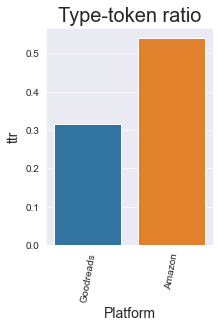

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

x_axis = list(ttr.keys())
y_axis = list(ttr.values())


fig = plt.figure( figsize=( 3 , 4 ) )


graph = sns.barplot( x=x_axis, y=y_axis,dodge=False )

graph.set_title('Type-token ratio' , size = 20) 
graph.set_xlabel('Platform' , size = 14) 
graph.set_ylabel('ttr' , size = 14 )

plt.xticks(rotation= 80)


plt.show()